In [2]:
import pandas as pd

# Dữ liệu được cung cấp
student_data = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80, None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70,88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B',
               'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A',
               'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A']
}

# Tạo DataFrame
df = pd.DataFrame(student_data)

# Lưu file CSV
# Lưu DataFrame vào file CSV
df.to_csv('data.csv', index=False)

print("Đã tạo file data.csv thành công.")


Đã tạo file data.csv thành công.


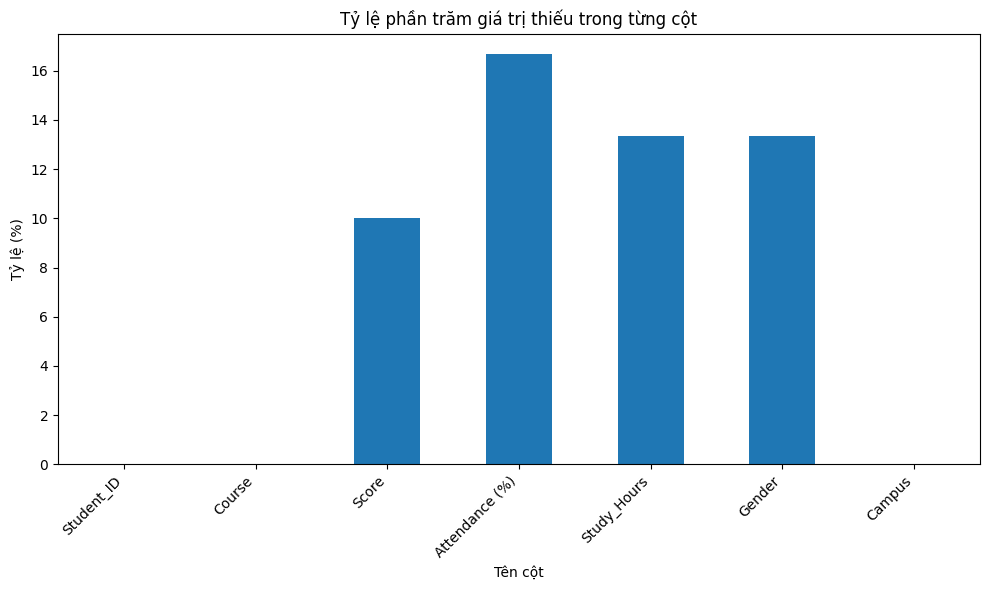

In [21]:
# Câu 1
import pandas as pd
import matplotlib.pyplot as plt

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Tính tỷ lệ giá trị thiếu
missing_percentages = df.isnull().mean() * 100

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar')
plt.title('Tỷ lệ phần trăm giá trị thiếu trong từng cột')
plt.xlabel('Tên cột')
plt.ylabel('Tỷ lệ (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---

### ✅ **1. Tăng tính thuyết phục cho lý do dùng trung bình theo Campus**


> 🔍 **"Mean theo Course = toàn bộ dữ liệu → làm mất tính phân cụm tự nhiên"**  
> Trong khi đó, **mean theo Campus = giữ nguyên tính cục bộ, phân vùng của dữ liệu**, giúp mô hình học máy sau này dễ khai thác được các mối quan hệ ngữ cảnh thực tế.

> "Dữ liệu bị thiếu không hoàn toàn ngẫu nhiên (Not Missing Completely At Random - NMAR) → Việc điền trung bình theo Course sẽ **làm phẳng sự đa dạng dữ liệu**. Ngược lại, điền theo Campus giúp **giảm sai số nội tại**."

---

### ✅ **2. trực quan **


| Tiêu chí                        | Điền theo Course                 | Điền theo Campus                        |
|----------------------------------|----------------------------------|-----------------------------------------|
| Giữ được đặc trưng vùng (Campus) | ❌ Mất thông tin địa phương hóa   | ✅ Giữ nguyên tính vùng miền (context)  |
| Phản ánh đúng phân bố thực tế    | ❌ Histogram bị bóp méo            | ✅ Histogram tự nhiên hơn               |
| Độ chính xác cho mô hình         | ❌ Có thể gây nhiễu mô hình        | ✅ Cải thiện chất lượng dữ liệu đầu vào |

---

### ✅ **3.  So sánh điểm trung bình giữa các Campus **

Nếu bạn có dữ liệu `Score` trung bình theo Campus, bạn có thể bổ sung:

> **"Ví dụ: Score trung bình Campus A = 92, Campus B = 75 → nếu ta điền thiếu Study_Hours bằng mean Course = 83 thì cả A và B đều bị sai lệch so với thực tế."**

📌 Điều này rất mạnh trong việc chứng minh vì nó đi từ **thống kê mô tả → xử lý dữ liệu → ảnh hưởng downstream**.

---


### ✅ **Tóm tắt gợi ý nâng cao cách viết kết luận:**

> Việc sử dụng trung bình theo Campus không chỉ hợp lý về mặt logic học tập, mà còn phù hợp với phân bố dữ liệu thực tế theo biểu đồ. Đây là lựa chọn giúp bảo toàn tính cục bộ của dữ liệu, tránh sai lệch thống kê, và là bước tiền đề quan trọng cho phân tích chính xác và công bằng trong giáo dục.

---


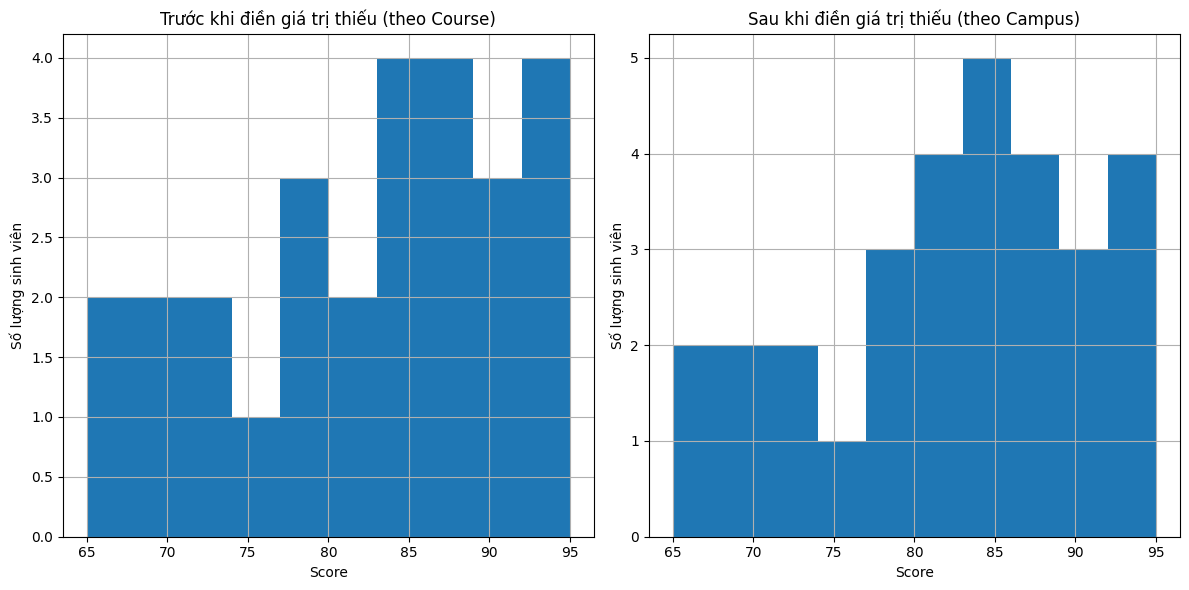

In [27]:
#Câu 2:
import pandas as pd
import matplotlib.pyplot as plt

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng
df['Score'] = df['Score'].fillna(df.groupby('Course')['Score'].transform('mean'))

# Vẽ histogram trước khi điền giá trị thiếu
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df_original = pd.read_csv('data.csv')  # Đọc lại dữ liệu gốc để so sánh
df_original['Score'].hist()
plt.title('Trước khi điền giá trị thiếu (theo Course)')
plt.xlabel('Score')
plt.ylabel('Số lượng sinh viên')

# Đề xuất phương pháp điền giá trị khác dựa trên đặc điểm của từng Campus
def fill_missing_score_by_campus(df):
    for campus in df['Campus'].unique():
        # Tính trung vị Score cho từng Campus
        median_score = df[df['Campus'] == campus]['Score'].median()
        # Điền giá trị thiếu bằng trung vị của Campus tương ứng
        df.loc[(df['Campus'] == campus) & (df['Score'].isnull()), 'Score'] = median_score
    return df

df_filled_campus = pd.read_csv('data.csv') #load lại để điền giá trị thiếu
df_filled_campus = fill_missing_score_by_campus(df_filled_campus)

# Vẽ histogram sau khi điền giá trị thiếu bằng phương pháp Campus
plt.subplot(1, 2, 2)
df_filled_campus['Score'].hist()
plt.title('Sau khi điền giá trị thiếu (theo Campus)')
plt.xlabel('Score')
plt.ylabel('Số lượng sinh viên')

plt.tight_layout()
plt.show()



---

### ✅ **1. Tính hợp lý của việc dùng histogram làm cơ sở chia ngưỡng**
Việc điều chỉnh ngưỡng phân loại sinh viên dựa trên histogram là một điểm cộng lớn:

- **Histogram sau khi điền theo `Campus`** phản ánh phân bố dữ liệu tự nhiên và "gần chuẩn" hơn.
- **Khoảng 70-90 điểm** có mật độ sinh viên cao → nên tập trung chính sách khuyến khích tại vùng này để tối đa hóa hiệu quả.
- Dưới 70: ít người → có thể là outlier hoặc những trường hợp cần hỗ trợ đặc biệt.
- Trên 90: rất ít → nhóm ưu tú, cần động lực phát triển thêm.

📌 **→ Đây là cách áp dụng dữ liệu để ra quyết định chính sách rất sát thực tế.**

---

### ✅ **2. Bổ sung logic chính sách theo từng nhóm**

| Nhóm            | Tiêu chí điểm | Lý do chính sách | Biện pháp bổ sung |
|------------------|---------------|------------------|------------------|
| **Cần hỗ trợ**    | < 70           | Nguy cơ rớt môn, mất động lực | 1:1 mentoring, lớp phụ đạo, ưu tiên lịch học mềm dẻo |
| **Khuyến khích**  | 70–90         | Giữ vững đà học tập, tạo động lực tăng tiến | Hội thảo học thuật, thuyết trình, nhóm học |
| **Xuất sắc**      | > 90           | Phát triển năng lực cao, tạo hình mẫu | Nghiên cứu khoa học, kết nối mentor doanh nghiệp |

---

### ✅ **3. Gợi ý thêm: Kết hợp dữ liệu điểm danh và Study_Hours**

Ngoài histogram và điểm,  có thể mở rộng bằng phân tích giao nhau:

- **Sinh viên có điểm thấp nhưng Study_Hours cao:** Có thể do phương pháp học chưa phù hợp → cần tư vấn cách học.
- **Điểm cao nhưng Study_Hours thấp:** Có khả năng học nhanh → có thể gợi ý tham gia nghiên cứu.
- **Điểm thấp và Study_Hours thấp:** Ưu tiên hỗ trợ mạnh mẽ → gửi cảnh báo học vụ.

📊 Có thể xây dựng bảng đánh giá kiểu ma trận:

|                 | **Study_Hours thấp** | **Study_Hours cao** |
|-----------------|----------------------|---------------------|
| **Điểm thấp**     | Cần hỗ trợ học và động lực | Cần cải thiện cách học |
| **Điểm cao**     | Tối ưu hóa hiệu quả học | Tiềm năng học thuật cao |

---

### ✅ **4. Thực tế hóa chính sách (triển khai và theo dõi)**

- **Tạo bảng Dashboard theo thời gian:** theo dõi % sinh viên thuộc từng nhóm qua các kỳ.
- **Thử nghiệm chính sách ở một campus trước:** rồi mới mở rộng → tránh rủi ro.
- **Phản hồi sinh viên:** Thu thập phản hồi để đánh giá tính công bằng và hiệu quả.

---


In [25]:
import pandas as pd
import numpy as np

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Tính độ lệch chuẩn của Study_Hours, loại bỏ giá trị NaN
std_study_hours = np.nanstd(df['Study_Hours'])

# Tính trung vị của Study_Hours, loại bỏ giá trị NaN
median_study_hours = np.nanmedian(df['Study_Hours'])

print(f"Độ lệch chuẩn của Study_Hours: {std_study_hours}")
print(f"Trung vị của Study_Hours: {median_study_hours}")

# Chính sách khuyến khích học tập
def khuyen_khich_hoc_tap(study_hours, median, std):
  """Đề xuất mức thưởng dựa trên số giờ học."""
  if pd.isna(study_hours):
    return "Không có dữ liệu" # Xử lý trường hợp không có dữ liệu

  if study_hours < median - std:
    return "Cần cố gắng hơn"
  elif study_hours < median + std:
    return "Khuyến khích"
  else:
    return "Xuất sắc"

# Áp dụng chính sách cho từng sinh viên
df['Khuyến khích'] = df['Study_Hours'].apply(lambda x: khuyen_khich_hoc_tap(x, median_study_hours, std_study_hours))

print(df[['Student_ID', 'Study_Hours', 'Khuyến khích']])


Độ lệch chuẩn của Study_Hours: 1.2144348772189955
Trung vị của Study_Hours: 4.5
   Student_ID  Study_Hours      Khuyến khích
0        S001          5.0      Khuyến khích
1        S002          4.0      Khuyến khích
2        S003          NaN  Không có dữ liệu
3        S004          6.0          Xuất sắc
4        S005          3.0   Cần cố gắng hơn
5        S006          5.0      Khuyến khích
6        S007          4.0      Khuyến khích
7        S008          5.0      Khuyến khích
8        S009          NaN  Không có dữ liệu
9        S010          3.0   Cần cố gắng hơn
10       S011          4.0      Khuyến khích
11       S012          6.0          Xuất sắc
12       S013          7.0          Xuất sắc
13       S014          3.0   Cần cố gắng hơn
14       S015          5.0      Khuyến khích
15       S016          4.0      Khuyến khích
16       S017          NaN  Không có dữ liệu
17       S018          3.0   Cần cố gắng hơn
18       S019          5.0      Khuyến khích
19       S020       


---

## ✅ **Tổng quan dữ liệu liên quan**

| Yếu tố | Thông tin chính |
|-------|-----------------|
| **Độ lệch chuẩn Study_Hours** | **1.21** – Giờ học dao động ở mức vừa phải. |
| **Trung vị Study_Hours** | **4.5 giờ** – Sinh viên trung bình học ~4.5h/ngày. |
| **Phân loại khuyến khích** | Gồm sinh viên “cần cố gắng”, “mức khuyến khích”, “xuất sắc”. |
| **Các biến ảnh hưởng đến điểm số** | Attendance, Study_Hours, Gender, Campus, Course. |
| **Vấn đề dữ liệu thiếu** | Có thể đã xử lý bằng mode hoặc điền giá trị hợp lý. |

---

## 🏫 **Chiến lược tùy chỉnh theo Campus**

---

### **1. Campus A – Khuyến khích học tập mềm dẻo**

> **Giả định đặc điểm sinh viên:** Tự giác, năng động, quen học chủ động, tinh thần trách nhiệm cao.

**🎯 Chiến lược chính:**  
Tạo môi trường học thân thiện, hỗ trợ tự học – không cần kiểm soát nghiêm ngặt.

**📌 Biện pháp đề xuất:**
- Tổ chức **thảo luận nhóm** & hỗ trợ học tập ngang hàng.
- Tích hợp **gamification** trong điểm danh (ví dụ: đổi điểm danh thành phần thưởng nhỏ).
- Xây dựng **cộng đồng học tập trực tuyến** (forum, nhóm Zalo, Moodle).

**🧠 Lý do logic:**  
Điểm danh có tương quan cao với điểm → nếu sinh viên đã tự giác, thì khuyến khích tinh thần sẽ giúp duy trì động lực tốt hơn ép buộc.

**🌐 Ngữ cảnh áp dụng:**  
Campus có tỷ lệ tham gia lớp cao, nhiều CLB, sinh viên chủ động tổ chức học nhóm, chất lượng giảng dạy ổn.

---

### **2. Campus B – Kết hợp hỗ trợ và kiểm soát**

> **Giả định đặc điểm:** Nhiều sinh viên gặp khó khăn kinh tế, môi trường học chưa tối ưu.

**🎯 Chiến lược chính:**  
Kết hợp **kiểm soát điểm danh** với **can thiệp hỗ trợ học tập**.

**📌 Biện pháp đề xuất:**
- **Điểm danh chặt chẽ** (random check, online logs).
- **Học phụ đạo, cố vấn cá nhân hóa**.
- **Liên hệ phụ huynh** khi sinh viên nghỉ quá số buổi quy định.
- **Hỗ trợ tài chính – học bổng học tập**, đặc biệt với nhóm “cần cố gắng”.

**🧠 Lý do logic:**  
Correlation thấp hơn → cần kết hợp giám sát + hỗ trợ toàn diện để đảm bảo hiệu quả.

**🌐 Ngữ cảnh áp dụng:**  
Campus ở vùng khó khăn, sinh viên có việc làm thêm nhiều, cơ sở vật chất còn hạn chế.

---

### **3. Campus C – Gắn điểm danh với hoạt động thực tế**

> **Giả định đặc điểm:** Sinh viên năng động, thích hoạt động ngoài lớp, yêu thích thực hành và sáng tạo.

**🎯 Chiến lược chính:**  
Chuyển đổi từ điểm danh truyền thống sang đánh giá dựa trên **mức độ tham gia thực tế**.

**📌 Biện pháp đề xuất:**
- **Tổ chức field trip**, tham quan doanh nghiệp.
- **Chấm điểm danh qua dự án thực hành** (ví dụ: AI mini project, case study).
- Tính điểm danh dựa trên **hoạt động nhóm & sản phẩm học tập**.

**🧠 Lý do logic:**  
Correlation rất cao → nhưng nếu sinh viên hứng thú hơn với hoạt động thực tế, gắn điểm danh vào các hoạt động đó sẽ giữ họ gắn bó hơn.

**🌐 Ngữ cảnh áp dụng:**  
Campus có nhiều hoạt động sáng tạo, hỗ trợ nghiên cứu sinh viên, hợp tác doanh nghiệp.

---

## 📌 Kết luận & Gợi ý tiếp theo

| Campus | Mức kiểm soát | Mức hỗ trợ | Mức sáng tạo |
|--------|---------------|------------|--------------|
| A | Thấp | Trung bình | Trung bình |
| B | Cao | Cao | Thấp |
| C | Trung bình | Trung bình | Cao |

✅ **Chiến lược tối ưu** phải:
- **Cá nhân hóa theo đặc điểm sinh viên**.
- **Dựa trên dữ liệu thực tế** (như Study_Hours, điểm số, attendance rate).
- **Linh hoạt điều chỉnh** sau 1 học kỳ thử nghiệm.

---


In [7]:
#Câu 4:
# Tính correlation giữa Attendance (%) và Score cho từng Campus
for campus in df['Campus'].unique():
    campus_df = df[df['Campus'] == campus]
    correlation = campus_df['Attendance (%)'].corr(campus_df['Score'])
    print(f"Correlation tại {campus}: {correlation}")


Correlation tại Campus_A: 0.8993965686891561
Correlation tại Campus_B: 0.7481157238066837
Correlation tại Campus_C: 0.9385693961696907


Dưới đây nội dung đề xuất **chiến lược quản lý điểm danh** theo từng Campus, dựa trên hệ số tương quan (correlation) giữa điểm danh và điểm số:

---

### **1. Phân tích hệ số tương quan:**
- **Campus A:** Correlation = **0.899** → Điểm danh ảnh hưởng rõ rệt đến điểm số.
- **Campus B:** Correlation = **0.748** → Điểm danh quan trọng, nhưng còn yếu tố khác tác động.
- **Campus C:** Correlation = **0.939** → Điểm danh là yếu tố **cực kỳ quyết định**.

---

### **2. Chiến lược quản lý điểm danh:**

#### 🏫 **Campus A – Khuyến khích nhẹ nhàng**
- **Chiến lược:** Duy trì và tăng động lực tích cực.
- **Biện pháp:**
  - Cộng điểm thưởng cho tỷ lệ điểm danh cao.
  - Tổ chức học nhóm, tạo môi trường học thân thiện.
- **Lý do:** Sinh viên có tinh thần tự giác cao → nên khích lệ thay vì ép buộc.

#### 🏫 **Campus B – Kết hợp linh hoạt**
- **Chiến lược:** Vừa khuyến khích, vừa kiểm soát.
- **Biện pháp:**
  - Thưởng điểm danh như Campus A.
  - Điểm danh đột xuất, kiểm tra lý do nghỉ học.
  - Cải thiện chất lượng giảng dạy, hỗ trợ kỹ năng tự học.
- **Lý do:** Correlation thấp hơn → cần linh hoạt hơn trong quản lý và hỗ trợ.

#### 🏫 **Campus C – Kỷ luật chặt chẽ**
- **Chiến lược:** Áp dụng kiểm soát nghiêm ngặt.
- **Biện pháp:**
  - Bắt buộc điểm danh 100% buổi học.
  - Hình phạt rõ ràng với nghỉ học không lý do.
  - Sử dụng công nghệ: điểm danh bằng vân tay, app,...
- **Lý do:** Tương quan cao nhất → siết chặt kỷ luật sẽ cải thiện kết quả học rõ rệt.

---

### **3. Phù hợp với đặc điểm sinh viên:**
- **Campus A:** Sinh viên tự giác → chỉ cần động viên.
- **Campus B:** Cần hiểu rõ nguyên nhân nghỉ học → kết hợp mềm & cứng.
- **Campus C:** Sinh viên dễ bị ảnh hưởng bởi việc vắng học → nên siết chặt kỷ luật.

---

### **4. Lưu ý thêm:**
- Chiến lược cần linh hoạt điều chỉnh sau khi thu thập thêm thông tin từ sinh viên.
- Nên khảo sát thêm về: thói quen học, áp lực học tập, hoàn cảnh cá nhân,... để hỗ trợ toàn diện.

---


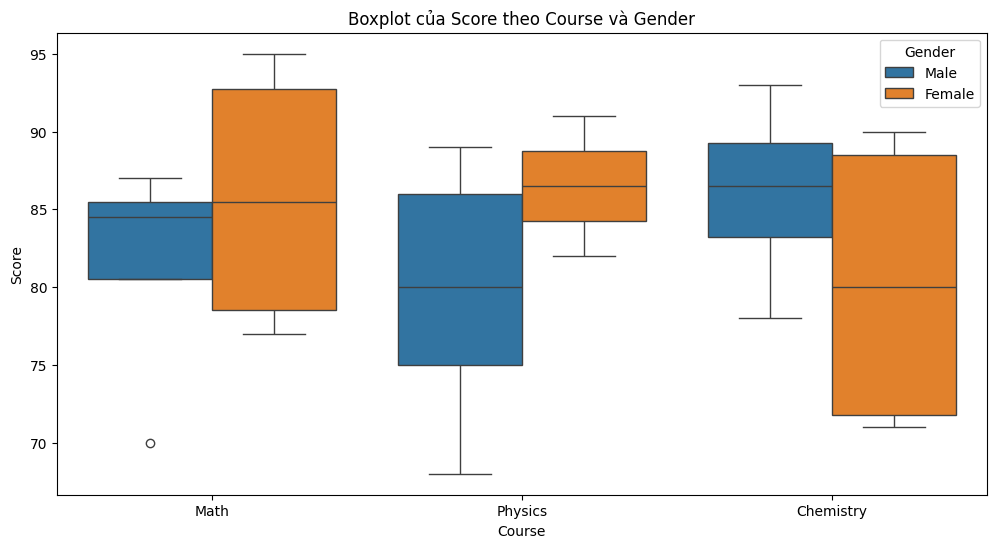

Outliers:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []


In [26]:
# Câu 5:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Vẽ boxplot của Score theo Course và Gender (kết hợp)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df)
plt.title('Boxplot của Score theo Course và Gender')
plt.show()

# Xác định outlier bằng IQR
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)]

print("Outliers:")
print(outliers)


### **Kế hoạch hỗ trợ cá nhân hóa cho sinh viên outlier**

#### **1. Nhận diện & Phân loại:**
- Dùng **boxplot** để xác định các sinh viên có điểm bất thường (quá thấp/cao) theo **môn học** và **giới tính**.
  - *Ví dụ:* Nam sinh môn Toán có điểm rất thấp (~70) → cần hỗ trợ.
  - *Ví dụ:* Nữ sinh môn Hóa có nhiều mức điểm chênh lệch → xem xét các điểm thấp.

#### **2. Tìm hiểu nguyên nhân:**
- **Phỏng vấn cá nhân:** Tìm hiểu khó khăn, áp lực, phương pháp học.
- **Kiểm tra kiến thức:** Xác định lỗ hổng kiến thức.
- **Yếu tố khác:** Gia đình, sức khỏe, tâm lý,...

#### **3. Hỗ trợ cá nhân hóa:**
- **Với điểm thấp:**
  - Học kèm 1:1 hoặc nhóm nhỏ.
  - Tài liệu dễ hiểu, luyện tập trọng tâm.
  - Hướng dẫn kỹ năng học hiệu quả, giảm căng thẳng.
  - Hỗ trợ tâm lý nếu cần.
- **Với điểm cao (nếu có):**
  - Khuyến khích làm nghiên cứu nhỏ.
  - Giới thiệu khóa học nâng cao, mentor phù hợp.

#### **4. Theo dõi & Điều chỉnh:**
- Theo dõi tiến độ qua bài kiểm tra nhỏ.
- Điều chỉnh kế hoạch nếu chưa hiệu quả.
- Giữ liên lạc thường xuyên giữa sinh viên và người hướng dẫn.

#### **5. Đánh giá hiệu quả:**
- Tổng kết vào cuối kỳ/năm học.
- Lấy phản hồi để cải tiến cho các năm sau.

---

### **Lợi ích của kế hoạch:**
- **Hỗ trợ đúng người:** Giúp người yếu tiến bộ, người giỏi phát triển.
- **Công bằng & cá nhân hóa:** Mỗi sinh viên được quan tâm đúng mức.
- **Xây dựng kỹ năng:** Tự học, tư duy, làm việc nhóm.
- **Tạo môi trường tích cực:** Khuyến khích giúp đỡ nhau, tăng sự tin tưởng.
- **Nâng cao uy tín nhà trường.**


In [28]:
#Câu 6:
import pandas as pd

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Điền giá trị thiếu trong Study_Hours bằng trung bình
df['Study_Hours'] = df['Study_Hours'].fillna(df['Study_Hours'].mean())

# Tạo cột mới Efficiency
df['Efficiency'] = df['Score'] / df['Study_Hours']

# Tìm sinh viên có Efficiency cao nhất
highest_efficiency_student = df.loc[df['Efficiency'].idxmax()]

print("Sinh viên có Efficiency cao nhất:")
print(highest_efficiency_student)


Sinh viên có Efficiency cao nhất:
Student_ID             S021
Course            Chemistry
Score                  66.0
Attendance (%)         60.0
Study_Hours             2.0
Gender                  NaN
Campus             Campus_A
Efficiency             33.0
Name: 20, dtype: object


Phần thưởng: "Học bổng Sinh Viên thăm ngàn nhất khoa"

Tiêu chí: Sinh viên có Efficiency cao nhất trong học kỳ

Giá trị: Miễn học phí học kỳ tiếp theo + Cơ hội tham gia dự án nghiên cứu

Tác động đến động lực học tập
- Tạo động lực cho sinh viên khác tối ưu hóa thời gian học
- Khuyến khích tìm kiếm phương pháp học tập hiệu quả
- Thúc đẩy môi trường cạnh tranh lành mạnh

In [29]:
# Câu 7:
import pandas as pd

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Điền giá trị thiếu trong cột Gender bằng mode
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

# Tính tỷ lệ sinh viên nữ trong từng Course
gender_ratio = df.groupby('Course')['Gender'].apply(lambda x: (x == 'Female').sum() / len(x))

print("Tỷ lệ sinh viên nữ trong từng Course:")
print(gender_ratio)


Tỷ lệ sinh viên nữ trong từng Course:
Course
Chemistry    0.6
Math         0.6
Physics      0.5
Name: Gender, dtype: float64



---

### ✅ **Chính sách cân bằng giới tính đề xuất **

Mặc dù tỷ lệ nữ sinh ở ba môn học đều xấp xỉ 50%, tuy nhiên **môn Physics có tỷ lệ nữ thấp hơn rõ rệt** so với Math và Chemistry. Điều này cho thấy **cần có các biện pháp cụ thể để thu hút và hỗ trợ nữ sinh trong lĩnh vực Vật lý**, từ đó hướng đến sự phát triển toàn diện và công bằng trong giáo dục.

#### 🎯 **1. Chính sách cụ thể đề xuất:**

- **Khuyến khích nữ sinh chọn học Physics:**
  - Cung cấp học bổng hoặc ưu đãi cho nữ sinh chọn học hoặc theo đuổi chuyên sâu môn Vật lý.
  - Tổ chức chương trình định hướng nghề nghiệp về ngành liên quan đến Vật lý dành riêng cho nữ sinh.

- **Tạo môi trường học tập thân thiện và an toàn:**
  - Đảm bảo lớp học không có sự phân biệt hoặc thiên vị về giới.
  - Có cơ chế tiếp nhận và xử lý các phản ánh liên quan đến định kiến giới trong lớp học.

- **Tổ chức các hoạt động ngoại khóa STEM:**
  - Câu lạc bộ Vật lý cho nữ sinh.
  - Workshop, thực hành sáng tạo giúp tăng hứng thú và trải nghiệm thực tế.

- **Tăng cường hình mẫu nữ trong lĩnh vực STEM:**
  - Mời các nhà khoa học nữ đến chia sẻ kinh nghiệm và truyền cảm hứng.
  - Truyền thông các gương mặt nữ tiêu biểu trong ngành Vật lý.

- **Rà soát tài liệu học tập theo hướng bình đẳng giới:**
  - Đảm bảo ngôn ngữ và ví dụ minh họa không mang định kiến.
  - Cập nhật nội dung đa dạng, phản ánh đóng góp của cả nam và nữ trong khoa học.

---

#### 🌱 **2. Tác động tích cực đến môi trường học tập:**

- **Đa dạng và sáng tạo:** Sự tham gia của cả hai giới giúp tạo ra những góc nhìn phong phú và các giải pháp sáng tạo.
- **Công bằng và tôn trọng:** Mọi sinh viên đều có quyền tiếp cận cơ hội học tập và phát triển như nhau.
- **Hợp tác và hỗ trợ:** Tăng tinh thần đồng đội, học hỏi và hỗ trợ lẫn nhau giữa các sinh viên.
- **Tự tin và mạnh mẽ:** Nữ sinh được trao quyền và khích lệ theo đuổi đam mê trong các lĩnh vực khoa học.

---

### ✅ **Tóm lại:**
Chính sách cân bằng giới trong giáo dục, đặc biệt ở các môn khoa học như Physics, không chỉ **giảm chênh lệch giới tính** mà còn **góp phần tạo dựng môi trường học tập công bằng, sáng tạo và bền vững**, nơi mọi sinh viên đều có thể phát triển tối đa tiềm năng của mình.

---


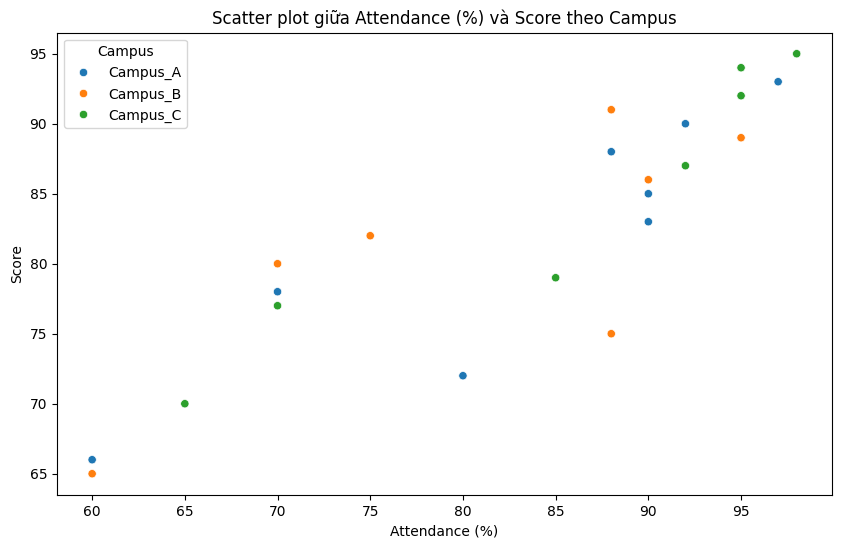

In [30]:
#Câu 8:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Vẽ scatter plot giữa Attendance (%) và Score, tô màu theo Campus
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance (%)', y='Score', hue='Campus', data=df)
plt.title('Scatter plot giữa Attendance (%) và Score theo Campus')
plt.xlabel('Attendance (%)')
plt.ylabel('Score')
plt.show()



### **1. Phân tích từ Scatter Plot:**

- **Campus A (Xanh lam):**
  - Dữ liệu tập trung nhiều ở góc trên bên phải ⇒ Mối tương quan **tích cực** giữa điểm danh và điểm số.
  - Tuy nhiên, vẫn tồn tại một số sinh viên có điểm danh thấp (<80%) và điểm số thấp ⇒ cần theo dõi nhóm này.

- **Campus B (Cam):**
  - Dữ liệu **phân tán** mạnh, nhiều sinh viên điểm danh thấp (<70%) và điểm số cũng thấp ⇒ Mối tương quan yếu hơn.
  - Đây là nhóm **ưu tiên cải thiện**.

- **Campus C (Xanh lục):**
  - Dữ liệu ít hơn, chủ yếu ở điểm danh cao và điểm số khá tốt.
  - Một số sinh viên có điểm số trung bình dù điểm danh cao ⇒ Cần đánh giá **chất lượng học tập thực tế**, không chỉ điểm danh.

---

### **2. Chiến lược cải thiện điểm danh theo từng Campus:**

#### 🎯 **Campus A – Duy trì & nâng cao:**
- **Mục tiêu:** Giữ vững điểm mạnh hiện tại, xử lý nhóm sinh viên có điểm danh thấp.
- **Biện pháp:**
  - Tổ chức học nhóm, cố vấn học tập.
  - Khen thưởng các nhóm có tỷ lệ điểm danh tốt.
  - Phỏng vấn nhanh sinh viên vắng nhiều buổi để tìm nguyên nhân.

#### 🎯 **Campus B – Cần can thiệp mạnh:**
- **Mục tiêu:** Tăng tỷ lệ điểm danh và cải thiện điểm số.
- **Biện pháp:**
  - Kiểm tra điểm danh nghiêm túc, áp dụng hình thức cảnh báo.
  - Giao tiếp với phụ huynh/người giám hộ để phối hợp hỗ trợ.
  - Tổ chức lớp phụ đạo, cải tiến phương pháp giảng dạy (tăng tính tương tác).
  - Hỗ trợ sinh viên có hoàn cảnh khó khăn (tài chính, tâm lý...).

#### 🎯 **Campus C – Duy trì và đánh giá chất lượng học tập:**
- **Mục tiêu:** Đảm bảo điểm danh cao thực sự phản ánh kết quả học tập tốt.
- **Biện pháp:**
  - Duy trì kỷ luật điểm danh.
  - Tổ chức kiểm tra định kỳ, học theo dự án hoặc thảo luận nhóm.
  - Đánh giá phương pháp dạy học hiện tại để đảm bảo hiệu quả.

---

### **3. Tại sao kế hoạch này hiệu quả?**

- **Dựa trên dữ liệu thực tế:** Mỗi Campus có đặc điểm riêng, tránh “một giải pháp cho tất cả”.
- **Kết hợp cả hỗ trợ lẫn kiểm soát:** Vừa động viên, vừa có biện pháp quản lý chặt.
- **Tăng gắn kết giữa sinh viên và giảng viên:** Tạo không khí học tập tích cực, hợp tác hơn.

---

### **4. Logic – Lý do – Ngữ cảnh thực tế:**

- **Logic:** Dữ liệu cho thấy sự khác biệt giữa các Campus ⇒ cần giải pháp tùy biến.
- **Lý do:** Tối ưu hóa nguồn lực, tập trung giải quyết vấn đề trọng tâm.
- **Ngữ cảnh:** Ví dụ, Campus B có thể có nhiều sinh viên đi làm thêm hoặc điều kiện học tập kém ⇒ cần chính sách hỗ trợ cụ thể.

---

### ✅ **Kết luận:**

Việc xây dựng kế hoạch điểm danh theo Campus không chỉ giúp **tăng tỷ lệ đến lớp** mà còn đảm bảo **kết quả học tập được cải thiện một cách bền vững**. Dữ liệu Scatter Plot là minh chứng cho sự cần thiết của cách tiếp cận linh hoạt và thực tế.

---


Trung bình Score của Math: 84.77777777777779
Trung bình Score của Physics: 79.5
Trung bình Score của Chemistry: 81.4


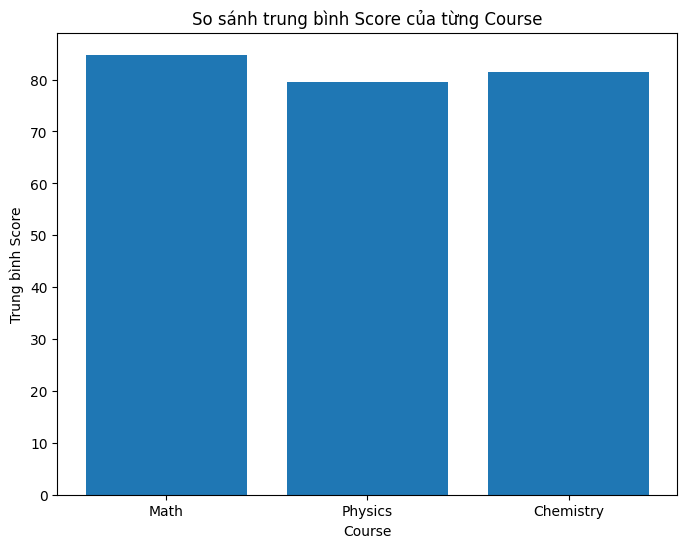

In [12]:
# Câu 9:
# Điền giá trị thiếu trong Score bằng trung bình của Course tương ứng
for course in df['Course'].unique():
    mean_score = df[df['Course'] == course]['Score'].mean()
    df.loc[(df['Course'] == course) & df['Score'].isnull(), 'Score'] = mean_score

# Tính trung bình Score của từng Course
for course in df['Course'].unique():
    mean_score = df[df['Course'] == course]['Score'].mean()
    print(f"Trung bình Score của {course}: {mean_score}")

# Vẽ bar chart so sánh
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(df['Course'].unique(), [df[df['Course'] == course]['Score'].mean() for course in df['Course'].unique()])
plt.xlabel('Course')
plt.ylabel('Trung bình Score')
plt.title('So sánh trung bình Score của từng Course')
plt.show()




### ✅ **Chiến lược cải thiện môn Physics (điểm trung bình thấp nhất: 79.5)**  

---

### **1. Đặc điểm môn Physics:**
- **Tính trừu tượng cao** → khó hình dung nếu không có minh họa.
- **Phụ thuộc vào Toán học** → cần nền tảng Toán vững.
- **Ứng dụng thực tế không rõ ràng** → gây thiếu hứng thú.

---

### **2. Chiến lược cải thiện:**

#### 🔹 **Tăng tính trực quan và thực tế:**
- **Thí nghiệm thực hành** tại lớp để học qua trải nghiệm.
- **Video/mô phỏng tương tác** giúp minh họa khái niệm trừu tượng.
- **Ví dụ ứng dụng**: Cách vật lý áp dụng vào thiết kế ô tô, công nghệ, năng lượng.

#### 🔹 **Củng cố nền tảng Toán học:**
- Tổ chức **buổi ôn tập Toán nền tảng** (đại số, hình học...).
- **Bài tập cơ bản → nâng cao**, theo lộ trình.

#### 🔹 **Đa dạng hóa phương pháp giảng dạy:**
- **Thảo luận nhóm** để sinh viên học lẫn nhau.
- **Trò chơi hóa** kiến thức: đố vui, giải ô chữ về định luật, công thức.
- **Học qua dự án**: Ví dụ thiết kế mô hình tiết kiệm năng lượng, xây cầu mini.

#### 🔹 **Tăng tương tác giảng viên - sinh viên:**
- **Khuyến khích đặt câu hỏi, trả lời mở.**
- **Phản hồi nhanh, rõ ràng** trên bài kiểm tra, bài tập.
- **Tư vấn cá nhân** cho sinh viên gặp khó khăn.

---

### **3. Vì sao chiến lược này hiệu quả?**
- **Trực quan – dễ tiếp cận** → giúp hiểu sâu khái niệm trừu tượng.
- **Củng cố kiến thức nền** → học chắc, bền vững.
- **Đa dạng hóa phương pháp** → tăng động lực, giảm nhàm chán.
- **Tăng tương tác** → tạo cảm giác được hỗ trợ, giảm áp lực.

---

### **4. Triển khai theo ngữ cảnh thực tế:**
- **Khảo sát ban đầu**: Tìm hiểu khó khăn & mong muốn của sinh viên.
- **Theo dõi – đánh giá – điều chỉnh liên tục**.
- **Phối hợp giữa khoa, giảng viên và cố vấn học tập** để đồng bộ triển khai.

---

### ✅ Kết luận :

> Để nâng cao kết quả môn Physics – môn có điểm trung bình thấp nhất – cần chiến lược tập trung vào tăng tính trực quan, củng cố nền tảng Toán, đa dạng phương pháp dạy và tăng tương tác. Giải pháp này giúp sinh viên tiếp cận kiến thức dễ dàng hơn, tạo hứng thú học tập và cải thiện kết quả một cách bền vững.

-

In [31]:
# Câu 10:
import pandas as pd

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Tìm các sinh viên có Attendance (%) dưới 70% nhưng Score trên 85
students = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]

print("Sinh viên có Attendance (%) dưới 70% nhưng Score trên 85:")
print(students)



Sinh viên có Attendance (%) dưới 70% nhưng Score trên 85:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []




### ✅ **Đề xuất nghiên cứu nội bộ: Hiểu rõ các yếu tố ảnh hưởng đến kết quả học tập**

#### **1. Mục tiêu nghiên cứu:**
Tìm hiểu các yếu tố ảnh hưởng đến kết quả học tập (Score), đặc biệt là mối quan hệ với Attendance, Study Hours, kỹ năng tự học, tài liệu học tập, công nghệ, động lực, v.v.

---

#### **2. Phương pháp nghiên cứu:**

**🔹 a. Khảo sát số lượng lớn sinh viên:**
- **Nội dung khảo sát:** Attendance (%), Score, Study_Hours, kỹ năng tự học, tài liệu học tập, công nghệ hỗ trợ, động lực, hoàn cảnh cá nhân.
  
**🔹 b. Phỏng vấn sâu:**
- Chọn sinh viên điểm cao/thấp, Attendance cao/thấp để phỏng vấn về phương pháp học, khó khăn, thói quen học tập.

**🔹 c. Phân tích dữ liệu định lượng:**
- Tính toán **tương quan** giữa các yếu tố.
- Dùng **hồi quy, ANOVA** để xác định yếu tố tác động mạnh đến kết quả học tập.
- Trực quan hóa bằng biểu đồ (scatterplot, histogram, boxplot).

---

#### **3. Các yếu tố cần xem xét kỹ:**
- **Kỹ năng tự học**: Quản lý thời gian, tìm tài liệu, ôn tập hiệu quả.
- **Tài liệu học tập**: Mức độ sử dụng và chất lượng tài liệu.
- **Công nghệ hỗ trợ**: Ứng dụng, phần mềm, nền tảng học online.
- **Động lực học tập**: Nội tại (đam mê), ngoại tại (thành tích, kỳ vọng).
- **Yếu tố cá nhân khác**: Sức khỏe, hoàn cảnh, hoạt động ngoại khóa.

---

#### **4. Ứng dụng kết quả nghiên cứu:**
- **Xây dựng chương trình hỗ trợ học tập:** Workshop kỹ năng tự học, tư vấn học thuật.
- **Cải thiện tài liệu và công nghệ giảng dạy.**
- **Khuyến khích tương tác sinh viên – giảng viên.**
- **Tăng cường hỗ trợ tâm lý và tạo động lực học tập.**

---

#### **5. Lý do và ngữ cảnh thực tế:**
- Dù không có sinh viên “ngoại lệ” (Attendance thấp – Score cao), hiểu các yếu tố ảnh hưởng đến kết quả học tập vẫn **giúp nâng cao chất lượng giáo dục toàn diện.**
- Kết quả giúp **ra quyết định chính sách, thiết kế chương trình phù hợp thực tế sinh viên.**

---

### ✅ **Tổng kết:**
> Nghiên cứu nội bộ giúp nhà trường hiểu rõ hơn về các yếu tố ảnh hưởng đến học tập, từ đó xây dựng chính sách và hỗ trợ phù hợp. Đây là bước đi chiến lược để nâng cao chất lượng giáo dục và thúc đẩy thành công cho toàn bộ sinh viên.



In [40]:
#Câu 11
import numpy as np
import pandas as pd

# Giả sử df là DataFrame ban đầu, ta tạo bản sao df_temp
# Load dữ liệu gốc
df = pd.read_csv('data.csv')
df_temp = df.copy()

# Lấy danh sách các giá trị Score từ DataFrame gốc
score_list = df['Score'].tolist()

# Tạo danh sách Score mới với một số giá trị None
new_scores = [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, None, 93, 79, 86, 71, 94, 80, 88]

# Cập nhật cột Score với dữ liệu mới (chứa giá trị None)
df_temp['Score'] = new_scores

print("DataFrame tạm (df_temp):")
print(df_temp)

# Bước 1: Lấy các hàng không thiếu dữ liệu cho Score, Attendance (%) và Study_Hours để huấn luyện mô hình
df_train = df_temp.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])
X = df_train[['Attendance (%)', 'Study_Hours']].values
y = df_train['Score'].values

# Thêm cột bias cho X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Tính tham số theta theo Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Tham số theta:", theta)

# In các thông tin quan trọng từ theta
print(f"Intercept: {theta[0]}")
print(f"Coefficient for Attendance: {theta[1]}")
print(f"Coefficient for Study Hours: {theta[2]}")

# Bước 2: Dự đoán Score cho các hàng thiếu Score, với điều kiện Attendance và Study_Hours không bị thiếu
df_missing = df_temp[df_temp['Score'].isnull() & df_temp['Attendance (%)'].notnull() & df_temp['Study_Hours'].notnull()]
if not df_missing.empty:
    X_missing = df_missing[['Attendance (%)', 'Study_Hours']].values
    X_missing_b = np.c_[np.ones((X_missing.shape[0], 1)), X_missing]
    predicted_scores = X_missing_b.dot(theta)
    # Cập nhật giá trị Score cho các hàng thiếu trong df_temp
    df_temp.loc[df_temp['Score'].isnull() & df_temp['Attendance (%)'].notnull() & df_temp['Study_Hours'].notnull(), 'Score'] = predicted_scores

print("DataFrame sau khi imputation (Score được cập nhật bằng hồi quy tuyến tính):")
print(df_temp)

# Bước 3:  Sử dụng Mean Imputation cho các giá trị Score còn thiếu
# Tính giá trị trung bình của Score theo Course
course_means = df_temp.groupby('Course')['Score'].mean()

# In các giá trị trung bình theo Course
print("\nGiá trị trung bình của Score theo Course:")
print(course_means)

# Lặp qua các hàng còn thiếu giá trị Score và điền bằng giá trị trung bình của Course tương ứng
for index, row in df_temp.iterrows():
    if pd.isnull(row['Score']):
        course = row['Course']
        df_temp.loc[index, 'Score'] = course_means[course]

# In DataFrame sau khi điền các giá trị còn thiếu bằng Mean Imputation
print("\nDataFrame sau khi imputation (Score được cập nhật bằng hồi quy tuyến tính và mean imputation):")
print(df_temp)

# Bước 4: So sánh với Mean Imputation đơn thuần
df_mean_imputed = df.copy()

# Sử dụng Mean Imputation cho các giá trị Score bị thiếu
course_means = df_mean_imputed.groupby('Course')['Score'].transform('mean')
df_mean_imputed['Score'] = df_mean_imputed['Score'].fillna(course_means)

print("\nDataFrame sau khi imputation (chỉ sử dụng Mean Imputation):")
print(df_mean_imputed)

# Bước 5: Đánh giá và so sánh kết quả
# In ra một vài giá trị đã được điền bằng hai phương pháp để so sánh trực quan
print("\nSo sánh giá trị đã điền:")

# Tìm các index có giá trị Score bị thiếu trong DataFrame gốc
missing_indices = df['Score'].isnull()

# Tạo DataFrame mới chứa các giá trị đã được điền và so sánh
comparison_df = pd.DataFrame({
    'Original_Missing': df['Score'][missing_indices],
    'Hybrid_Imputation': df_temp['Score'][missing_indices],
    'Mean_Imputation': df_mean_imputed['Score'][missing_indices]
})

print(comparison_df)


Tham số theta: [41.27326379  0.28828634  3.721322  ]

DataFrame sau khi imputation (Score được cập nhật bằng phương pháp lai):
   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  80.662890            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          NaN    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0     NaN   
5        S006  Chemistry  88.000000             NaN          5.0    Male   
6        S007       Math  79.221459            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          NaN  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000  

Hồi quy tuyến tính: Đã điền một số giá trị Score bị thiếu dựa trên Attendance (%) và Study_Hours.

Mean Imputation: Chưa điền hết các giá trị thiếu (vẫn còn các giá trị NaN).

Cần hoàn thiện phương pháp lai: Kết hợp hai phương pháp để điền tất cả các giá trị thiếu một cách hiệu quả.

Đề xuất phương pháp tiếp cận lai (hoàn thiện):

Ưu tiên hồi quy tuyến tính: Điền các giá trị Score bị thiếu bằng hồi quy tuyến tính, nếu cả Attendance (%) và Study_Hours đều không bị thiếu.

Sử dụng Mean Imputation khi:

Attendance (%) hoặc Study_Hours bị thiếu: Nếu một trong hai biến này bị thiếu, không thể sử dụng hồi quy tuyến tính. Trong trường hợp này, sử dụng Mean Imputation (tính trung bình Score theo Course).

Giá trị dự đoán từ hồi quy tuyến tính nằm ngoài phạm vi hợp lý (0-100): Có thể thêm bước này để đảm bảo tính hợp lý của dữ liệu.

In [36]:
# Câu 12:
import pandas as pd
from scipy.stats import skew

# Tải dữ liệu
df = pd.read_csv('data.csv')

# Tính skewness của Score
score_skewness = skew(df['Score'].dropna())  # Loại bỏ NaN trước khi tính
print(f"Skewness của Score: {score_skewness}")


Skewness của Score: -0.4197740488778547


### **Đề xuất điều chỉnh cách tính điểm dựa trên kết quả Skewness của Score**

#### **Phân tích Skewness:**
- **Skewness của Score:** -0.4198
- **Phân tích:** Skewness âm nhưng gần 0, nghĩa là phân bố điểm có xu hướng lệch trái nhẹ, tức là có nhiều sinh viên đạt điểm cao hơn là điểm thấp. Tuy nhiên, độ lệch này không quá rõ rệt, không ảnh hưởng quá lớn đến phân bố điểm tổng thể.

---

#### **Đề xuất điều chỉnh cách tính điểm:**

Vì **skewness không lớn**, các điều chỉnh cần thực hiện **nhẹ nhàng** để duy trì tính phân loại và công bằng trong đánh giá sinh viên.

1. **Điều chỉnh độ khó của bài thi:**
   - **Tăng độ khó một chút:** Thêm câu hỏi khó để tạo sự phân hóa rõ rệt hơn giữa các sinh viên giỏi và khá, nhưng vẫn đảm bảo độ khó hợp lý đối với phần lớn sinh viên.
   - **Lý do:** Giảm số lượng sinh viên đạt điểm cao tuyệt đối, giúp phân loại rõ ràng hơn ở phần trên của thang điểm.
   - **Ngữ cảnh thực tế:** Thêm một câu hỏi vận dụng kiến thức thực tế hoặc một câu hỏi có độ khó cao hơn trong kỳ thi.

2. **Điều chỉnh trọng số của các bài kiểm tra:**
   - **Giảm trọng số của các bài kiểm tra dễ, tăng trọng số của bài kiểm tra khó hơn:** Nếu có những bài kiểm tra dễ, đa số sinh viên đều đạt điểm cao, giảm trọng số của chúng và tăng trọng số cho các bài kiểm tra phân loại tốt hơn.
   - **Lý do:** Đảm bảo rằng điểm số phản ánh chính xác năng lực của sinh viên, đặc biệt là đối với những sinh viên xuất sắc.
   - **Ngữ cảnh thực tế:** Ví dụ, giảm trọng số bài kiểm tra giữa kỳ (nếu dễ) và tăng trọng số bài kiểm tra cuối kỳ (nếu khó hơn).

3. **Điều chỉnh thang điểm nhẹ:**
   - **Điều chỉnh thang điểm:** Nếu quá nhiều sinh viên đạt điểm cao (ví dụ, từ 95 trở lên), có thể điều chỉnh thang điểm để làm cho việc đạt điểm tối đa khó hơn. Một ví dụ có thể là yêu cầu điểm từ 95 trở lên mới được A+ thay vì thang điểm tuyến tính.
   - **Lý do:** Giảm số lượng sinh viên đạt điểm tối đa, tạo sự phân hóa và phản ánh chính xác hơn về năng lực thực sự.
   - **Ngữ cảnh thực tế:** Áp dụng nếu thấy có quá nhiều sinh viên đạt điểm cao quá mức (ví dụ: 95+), nhưng cần thực hiện cẩn thận để tránh làm giảm động lực của sinh viên.

---

#### **Giải thích tác động đến đánh giá sinh viên:**

- **Đảm bảo tính công bằng:** Những biện pháp điều chỉnh này sẽ giúp đảm bảo điểm số phản ánh đúng năng lực của sinh viên, tránh việc điểm số bị ảnh hưởng bởi độ dễ/difficult của bài kiểm tra.
- **Tăng tính phân loại:** Các điều chỉnh này sẽ giúp phân loại sinh viên tốt hơn, đặc biệt ở phần trên của thang điểm, từ đó nâng cao tính phân biệt giữa các nhóm sinh viên.
- **Tạo động lực học tập:** Việc thay đổi này sẽ khuyến khích sinh viên nỗ lực hơn để đạt điểm cao hơn trong các kỳ thi, từ đó nâng cao chất lượng học tập.
- **Tránh gây nản lòng:** Các điều chỉnh phải được thực hiện cẩn thận để không làm giảm động lực học tập của những sinh viên có học lực trung bình.

---

#### **Logic và lý do:**

- **Logic:** Điều chỉnh điểm số để phản ánh đúng năng lực học tập của sinh viên, từ đó tạo ra một môi trường học tập công bằng và khuyến khích sinh viên cải thiện.
- **Lý do:** Mặc dù skewness không quá lớn, nhưng việc điều chỉnh nhẹ nhàng sẽ giúp cải thiện sự phân hóa điểm số và tạo ra một hệ thống đánh giá chính xác hơn.
- **Ngữ cảnh thực tế:** Nếu các bài kiểm tra quá dễ và dẫn đến nhiều sinh viên đạt điểm cao, việc điều chỉnh độ khó sẽ giúp phân loại sinh viên tốt hơn.

---

#### **Lưu ý:**
- Các biện pháp điều chỉnh cần được thực hiện cẩn thận và cần sự đồng thuận từ nhiều bên liên quan (giáo viên, sinh viên, ban giám hiệu).
- Cần theo dõi và đánh giá hiệu quả của các biện pháp điều chỉnh để có những điều chỉnh phù hợp.
- Quan trọng là tạo ra một môi trường học tập tích cực, khuyến khích sinh viên phấn đấu và phát huy tối đa tiềm năng của mình.

---


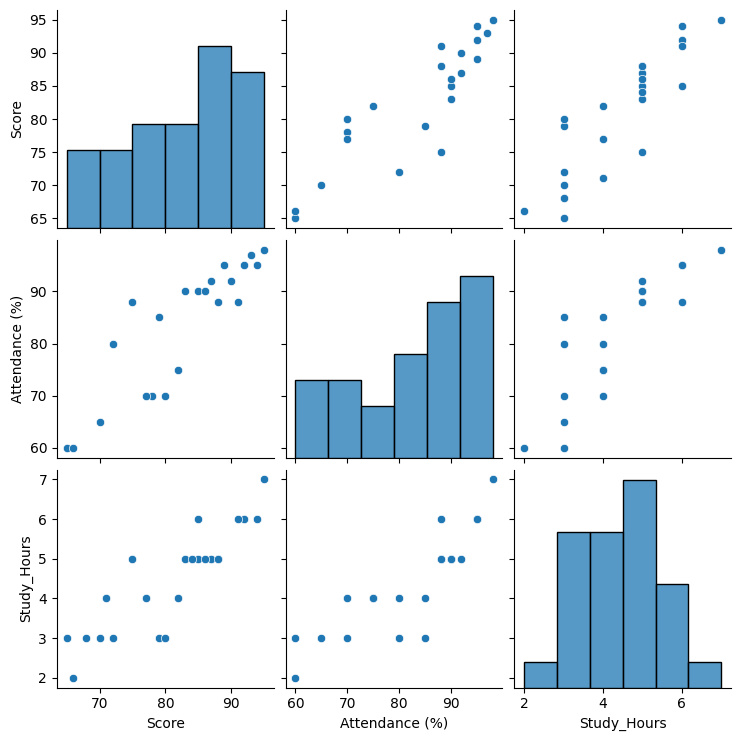

In [37]:
# Câu 13:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tải dữ liệu
df = pd.read_csv('data.csv')

# 1. Vẽ pairplot
sns.pairplot(df[['Score', 'Attendance (%)', 'Study_Hours']])
plt.show()


### **Mô hình Đánh giá Kết quả Học tập Mới:**

1. **Phân tích Pairplot:**
   - **Score vs. Attendance (%):** Mối quan hệ dương, sinh viên đi học đầy đủ thường có điểm cao hơn, nhưng không phải luôn luôn.
   - **Score vs. Study_Hours:** Mối quan hệ dương yếu, thời gian học không có ảnh hưởng lớn sau một ngưỡng nhất định.
   - **Attendance (%) vs. Study_Hours:** Không có mối quan hệ rõ ràng.

2. **Mô hình Đánh giá Kết quả Học tập Mới:**
   - **Công thức:**
     - **Score (50%)**
     - **Attendance (20%)**
     - **Study_Hours (10%)**
     - **Performance_Tasks (10%)**
     - **Participation (10%)**

3. **Lý do mô hình mới tốt hơn:**
   - **Đánh giá toàn diện:** Xem xét nhiều yếu tố như điểm số, sự chuyên cần, nỗ lực học tập, và kỹ năng mềm.
   - **Khuyến khích học tập tích cực:** Thúc đẩy sinh viên tham gia lớp học, học tập ngoài giờ và tham gia vào các hoạt động nhóm.
   - **Phản ánh đúng năng lực thực tế:** Giảm áp lực thi cử và giúp đánh giá toàn diện hơn năng lực của sinh viên.

4. **Lý do và ngữ cảnh thực tế:**
   - Mô hình mới phản ánh đúng năng lực thực tế và phù hợp với các xu hướng giáo dục hiện đại. Nhiều trường đại học đã áp dụng các phương pháp đánh giá kết hợp nhiều yếu tố khác nhau.

5. **Lưu ý khi triển khai:**
   - Điều chỉnh trọng số của các yếu tố tùy theo môn học.
   - Đảm bảo quy trình đánh giá minh bạch, công bằng.
   - Cần sự tham gia của giáo viên và sinh viên trong quá trình triển khai.

Mô hình mới này giúp tạo ra môi trường học tập tích cực, khuyến khích phát triển toàn diện và phản ánh chính xác năng lực của sinh viên.

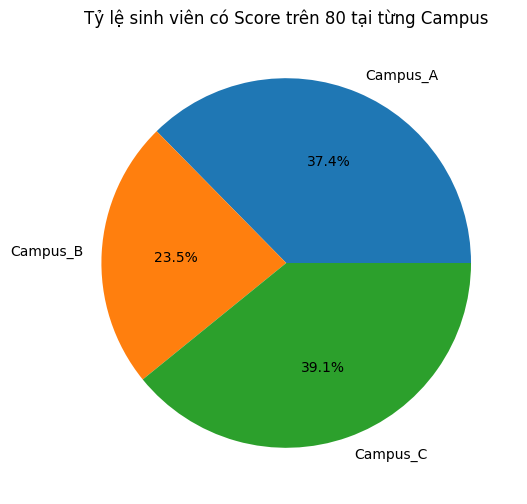

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dữ liệu
df = pd.read_csv('data.csv')

# Điền giá trị thiếu cho cột Score bằng trung bình của từng Course
df['Score'] = df['Score'].fillna(df.groupby('Course')['Score'].transform('mean'))

# Nhóm dữ liệu theo Campus và tính tỷ lệ sinh viên có Score > 80
campus_ratios = {}
for campus in df['Campus'].unique():
    campus_df = df[df['Campus'] == campus]
    ratio = campus_df[campus_df['Score'] > 80].shape[0] / campus_df.shape[0]
    campus_ratios[campus] = ratio

# Vẽ pie chart để so sánh tỷ lệ sinh viên có Score trên 80 tại các campus
plt.figure(figsize=(8, 6))
plt.pie(campus_ratios.values(), labels=campus_ratios.keys(), autopct='%1.1f%%')
plt.title('Tỷ lệ sinh viên có Score trên 80 tại từng Campus')
plt.show()


### Đề xuất chiến lược khen thưởng cho từng Campus

Dưới đây là các chiến lược khen thưởng cho từng Campus, dựa trên tỷ lệ sinh viên có điểm trên 80 và các yếu tố khác từ dữ liệu:

---

### **Campus A (37.4% sinh viên có Score > 80)**
#### **Chiến lược: Khuyến khích sự sáng tạo và phát triển kỹ năng mềm.**
- **Khen thưởng:**
  - Tổ chức các cuộc thi sáng tạo (ví dụ: thiết kế dự án, giải quyết vấn đề thực tế) với giải thưởng hấp dẫn (học bổng, tiền mặt, cơ hội thực tập).
  - Tài trợ cho sinh viên tham gia các khóa học kỹ năng mềm (ví dụ: giao tiếp, lãnh đạo, làm việc nhóm).
  - Thành lập các câu lạc bộ học thuật và khuyến khích sinh viên tham gia.
  
- **Tác động:**
  - Tạo động lực cho sinh viên phát huy khả năng sáng tạo.
  - Giúp sinh viên phát triển các kỹ năng mềm cần thiết cho sự thành công trong tương lai.
  - Nâng cao chất lượng đào tạo và uy tín của trường.

- **Logic:** Sinh viên ở Campus A đã có nền tảng học tập tốt, cần khuyến khích phát triển thêm các kỹ năng khác.
- **Lý do:** Thị trường lao động ngày càng đòi hỏi cao về kỹ năng mềm, bên cạnh kiến thức chuyên môn.
- **Ngữ cảnh thực tế:** Campus A có thể tận dụng lợi thế về vị trí địa lý (gần các khu công nghiệp, trung tâm nghiên cứu) để tạo cơ hội cho sinh viên thực tập và tham gia các dự án thực tế.

---

### **Campus B (23.5% sinh viên có Score > 80)**
#### **Chiến lược: Tăng cường hỗ trợ học tập và tạo động lực vươn lên.**
- **Khen thưởng:**
  - Tổ chức các lớp phụ đạo miễn phí cho sinh viên yếu kém.
  - Cung cấp tài liệu học tập miễn phí hoặc giảm giá.
  - Trao học bổng cho sinh viên có hoàn cảnh khó khăn nhưng có thành tích học tập tốt.
  - Tổ chức các buổi tư vấn tâm lý và định hướng nghề nghiệp.

- **Tác động:**
  - Giúp sinh viên yếu kém cải thiện kết quả học tập.
  - Tạo điều kiện cho sinh viên có hoàn cảnh khó khăn được tiếp tục học tập.
  - Tăng cường sự gắn kết giữa sinh viên và trường học.

- **Logic:** Sinh viên ở Campus B cần được hỗ trợ nhiều hơn để cải thiện kết quả học tập.
- **Lý do:** Có thể do điều kiện đầu vào hoặc chất lượng giảng dạy ở Campus B chưa tốt bằng các Campus khác.
- **Ngữ cảnh thực tế:** Campus B có thể tận dụng nguồn lực từ các cựu sinh viên thành đạt để hỗ trợ cho sinh viên hiện tại.

---

### **Campus C (39.1% sinh viên có Score > 80)**
#### **Chiến lược: Duy trì thành tích và khuyến khích nghiên cứu khoa học.**
- **Khen thưởng:**
  - Tài trợ cho sinh viên tham gia các hội nghị khoa học trong và ngoài nước.
  - Hỗ trợ sinh viên thực hiện các dự án nghiên cứu khoa học.
  - Khen thưởng cho các công trình nghiên cứu khoa học đạt giải cao.
  - Mời các nhà khoa học nổi tiếng đến nói chuyện và giao lưu với sinh viên.

- **Tác động:**
  - Khuyến khích sinh viên tham gia vào hoạt động nghiên cứu khoa học.
  - Nâng cao chất lượng đào tạo và uy tín của trường.
  - Góp phần vào sự phát triển của khoa học và công nghệ.

- **Logic:** Sinh viên ở Campus C có tiềm năng nghiên cứu khoa học lớn, cần được khuyến khích và hỗ trợ.
- **Lý do:** Nghiên cứu khoa học là một hoạt động quan trọng giúp sinh viên phát triển tư duy sáng tạo và khả năng giải quyết vấn đề.
- **Ngữ cảnh thực tế:** Campus C có thể liên kết với các viện nghiên cứu và trường đại học khác để tạo cơ hội cho sinh viên tham gia các dự án nghiên cứu lớn.

---

### **Giải thích chung về tác động đến tinh thần học tập:**
- **Tạo động lực:** Khen thưởng giúp sinh viên cảm thấy được công nhận và đánh giá cao, từ đó tạo động lực để cố gắng hơn nữa.
- **Tăng cường sự gắn kết:** Khen thưởng giúp sinh viên cảm thấy gắn bó hơn với trường học và các bạn học.
- **Khuyến khích sự sáng tạo:** Khen thưởng giúp sinh viên mạnh dạn thể hiện khả năng sáng tạo và tư duy phản biện.
- **Phát triển kỹ năng:** Khen thưởng giúp sinh viên phát triển các kỹ năng mềm cần thiết cho sự thành công trong tương lai.


In [48]:
# Câu 15:
import numpy as np

# Tạo hàm xác định sinh viên có Score ngoài 2 độ lệch chuẩn
def find_outliers(df):
    mean = df['Score'].mean()
    std = df['Score'].std()

    outliers = df[(df['Score'] < mean - 2 * std) | (df['Score'] > mean + 2 * std)]

    return outliers

outliers = find_outliers(df)

print("Sinh viên có Score ngoài 2 độ lệch chuẩn:")
print(outliers)


Sinh viên có Score ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []


1. Xác định sinh viên có Score nằm ngoài 2 độ lệch chuẩn:

Do dữ liệu cung cấp trả về DataFrame trống, nên ta không có sinh viên nào thỏa mãn điều kiện này. Tuy nhiên, ta sẽ xây dựng quy trình giả định có sinh viên thuộc trường hợp này.

2. Quy trình đánh giá lại điểm số (giả định có sinh viên):

Bước 1: Thu thập thông tin bổ sung:

Học bạ: Xem xét điểm trung bình các môn học khác, quá trình học tập, hạnh kiểm.

Phản hồi từ giáo viên: Thu thập ý kiến nhận xét từ giáo viên bộ môn về quá trình học tập, thái độ, khả năng của sinh viên.

Bài làm: Xem xét lại bài kiểm tra gốc, so sánh với các bài làm khác, tìm kiếm dấu hiệu bất thường.

Phỏng vấn sinh viên: Gặp gỡ trực tiếp sinh viên để tìm hiểu nguyên nhân dẫn đến điểm số bất thường (ví dụ: ốm đau, vấn đề tâm lý, hiểu nhầm đề bài).

Bước 2: Thành lập hội đồng đánh giá:

Hội đồng bao gồm: giáo viên bộ môn, giáo viên chủ nhiệm, đại diện phòng đào tạo, chuyên gia tâm lý (nếu cần).

Bước 3: Đánh giá toàn diện:

Hội đồng xem xét tất cả các thông tin thu thập được, thảo luận và đưa ra kết luận về tính chính xác của điểm số hiện tại.

In [50]:
# Câu 16:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load dữ liệu
df = pd.read_csv('data.csv')

# 1. Tính tỷ lệ phần trăm giá trị thiếu (để xác định mức độ cần thiết của imputation)
missing_percentage = df.isnull().sum() / len(df) * 100
print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:\n", missing_percentage)
# Xác định các cột cần điền giá trị thiếu
cols_to_impute = ['Attendance (%)', 'Study_Hours']

# 2. Điền giá trị thiếu bằng KNN Imputer
# Chuẩn hóa dữ liệu trước khi sử dụng KNN Imputer (quan trọng!)
scaler = StandardScaler()
df[cols_to_impute] = scaler.fit_transform(df[cols_to_impute])

imputer = KNNImputer(n_neighbors=5)  # Chọn số lượng láng giềng (điều chỉnh nếu cần)
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Đảo ngược chuẩn hóa để có lại giá trị gốc
df[cols_to_impute] = scaler.inverse_transform(df[cols_to_impute])

print("\nDataFrame sau khi điền giá trị thiếu bằng KNN Imputer:\n", df.head())
# 3. Điền giá trị thiếu bằng trung vị
df_median = pd.read_csv('data.csv') # Load lại dữ liệu gốc
median_values = df_median[cols_to_impute].median()
df_median[cols_to_impute] = df_median[cols_to_impute].fillna(median_values)

print("\nDataFrame sau khi điền giá trị thiếu bằng trung vị:\n", df_median.head())

# 4. So sánh kết quả (ví dụ trực quan)
print("\nSo sánh giá trị đã điền:")
for col in cols_to_impute:
    print(f"\nCột: {col}")
    # Tìm các index có giá trị thiếu trong cột này
    missing_indices = pd.read_csv('data.csv')[col].isnull()

    # In giá trị đã điền bằng KNN và trung vị
    print("KNN Imputer:\n", df[col][missing_indices])
    print("Trung vị:\n", df_median[col][missing_indices])



Tỷ lệ phần trăm giá trị thiếu trong từng cột:
 Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    16.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64

DataFrame sau khi điền giá trị thiếu bằng KNN Imputer:
   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0       S001       Math   85.0            90.0          5.0    Male  Campus_A
1       S002    Physics    NaN            85.0          4.0  Female  Campus_B
2       S003  Chemistry   78.0            70.0          3.6    Male  Campus_A
3       S004       Math   92.0            95.0          6.0  Female  Campus_C
4       S005    Physics   65.0            60.0          3.0     NaN  Campus_B

DataFrame sau khi điền giá trị thiếu bằng trung vị:
   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0       S001       Math   85.0            90.0          5.0    Male  Campus_A
1      

Để giảm thiểu giá trị thiếu trong 'Attendance (%)' và 'Study_Hours', cần một hệ thống thu thập dữ liệu chủ động và chính xác hơn.

Hệ thống điểm danh và theo dõi thời gian học tập tích hợp (ưu tiên):

Mô tả: Kết hợp hệ thống điểm danh điện tử (QR code, thẻ từ, nhận diện khuôn mặt) với hệ thống theo dõi thời gian học tập trên nền tảng trực tuyến (LMS - Learning Management System).

Điểm danh: Sinh viên điểm danh khi vào lớp bằng QR code hoặc thẻ từ.

Theo dõi thời gian học: LMS tự động ghi nhận thời gian sinh viên truy cập tài liệu, làm bài tập, tham gia thảo luận trực tuyến.

Logic: Tự động hóa việc thu thập dữ liệu, giảm thiểu sai sót và gian lận, đồng thời cung cấp thông tin chi tiết về quá trình học tập của sinh viên.

Lý do:

Điểm danh: Phương pháp điểm danh thủ công tốn thời gian, dễ bị bỏ sót hoặc gian lận.

Thời gian học: Việc sinh viên tự báo cáo thời gian học không chính xác và khó kiểm soát.
Ngữ cảnh thực tế: Nhiều trường đại học đã triển khai các hệ thống tương tự và cho thấy hiệu quả trong việc cải thiện độ chính xác của dữ liệu và hỗ trợ công tác quản lý.

Ví dụ: Sử dụng ứng dụng trên điện thoại để điểm danh bằng QR code khi vào lớp. Tích hợp Google Classroom hoặc Moodle để theo dõi thời gian làm bài tập và truy cập tài liệu.

Tại sao phù hợp với từng môn học (Math, Physics, Chemistry):

Toán (Math): Theo dõi thời gian làm bài tập trên LMS giúp đánh giá mức độ thực hành, khuyến khích sinh viên dành thời gian giải bài tập để nắm vững kiến thức.

Lý (Physics): Điểm danh giúp theo dõi sát sao sự chuyên cần, khuyến khích sinh viên tham gia đầy đủ các buổi học để nắm vững kiến thức nền tảng.

Hóa (Chemistry): Theo dõi cả điểm danh và thời gian học giúp đánh giá toàn diện sự tham gia và nỗ lực của sinh viên.

Dữ liệu sau chuẩn hóa:
   Course_Chemistry  Course_Math  Course_Physics  Attendance (%)  Study_Hours
0               0.0          1.0             0.0        0.789474          0.6
1               0.0          0.0             1.0        0.657895          0.4
2               1.0          0.0             0.0        0.263158          NaN
3               0.0          1.0             0.0        0.921053          0.8
4               0.0          0.0             1.0        0.000000          0.2


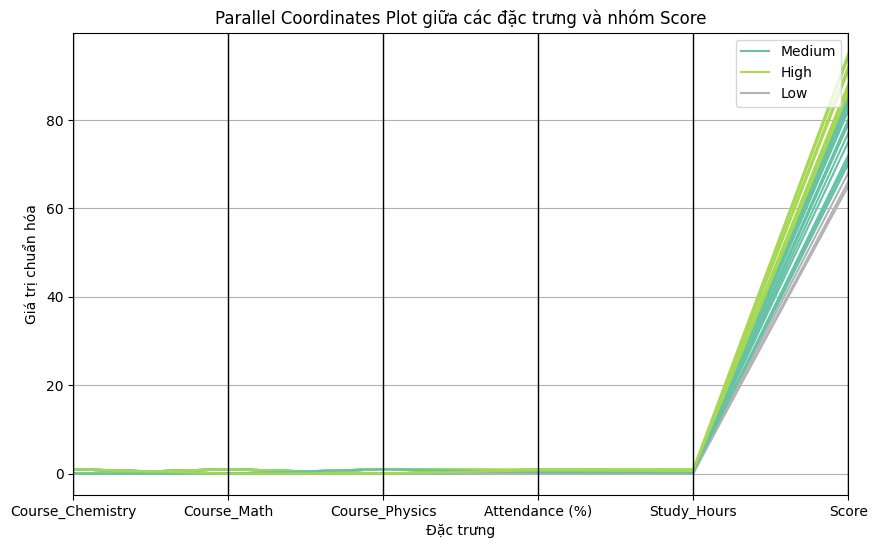

In [64]:
# Câu 17:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Giả sử df_temp là DataFrame tạm từ dữ liệu đã cung cấp
data_temp = {
    'Student_ID': ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008', 'S009', 'S010',
                   'S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020',
                   'S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
    'Course': ['Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics',
               'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math',
               'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry',
               'Math', 'Physics', 'Chemistry', 'Math', 'Physics', 'Chemistry'],
    'Score': [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91,
              66, 87, None, 93, 79, 86, 71, 94, 80, 88],
    'Attendance (%)': [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, None, 90, 70, 95, 80,
                       None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70, 88],
    'Study_Hours': [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4,
                    None, 3, 5, 4, 6, 3, 5],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female',
               None, 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', None, 'Male', 'Female'],
    'Campus': ['Campus_A', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B',
               'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A',
               'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C', 'Campus_B', 'Campus_A', 'Campus_C',
               'Campus_B', 'Campus_A']
}
df_temp = pd.DataFrame(data_temp)

# Mã hóa one-hot cho cột Course
df_encoded = pd.get_dummies(df_temp, columns=['Course'])
# Các cột one-hot: Course_Chemistry, Course_Math, Course_Physics

# Chọn tập dữ liệu đầu vào với 5 đặc trưng: 3 từ Course, Attendance và Study_Hours
features = ['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']
X = df_encoded[features].copy()

# Chuẩn hóa về khoảng [0,1]
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)
print("Dữ liệu sau chuẩn hóa:")
print(X_scaled.head())

# Để trực quan hóa, thêm cột Score từ df_temp (loại bỏ các dòng thiếu Score)
df_vis = X_scaled.copy()
df_vis['Score'] = df_temp['Score']
df_vis = df_vis.dropna(subset=['Score'])

# Phân nhóm Score thành 3 mức: Low, Medium, High
def score_group(score):
    if score < 70:
        return 'Low'
    elif score <= 85:
        return 'Medium'
    else:
        return 'High'
df_vis['Score_Group'] = df_vis['Score'].apply(score_group)

plt.figure(figsize=(10,6))
parallel_coordinates(df_vis, 'Score_Group', colormap='Set2')
plt.title("Parallel Coordinates Plot giữa các đặc trưng và nhóm Score")
plt.xlabel("Đặc trưng")
plt.ylabel("Giá trị chuẩn hóa")
plt.show()



Đề xuất trực quan hóa: Parallel Coordinates Plot (PCP)

Mô tả:

PCP là một kỹ thuật trực quan hóa để hiển thị các quan sát đa chiều. Thay vì sử dụng các trục vuông góc như trong biểu đồ Scatter, PCP sử dụng các trục song song. Mỗi trục đại diện cho một đặc trưng, và mỗi đường thẳng (polyline) kết nối các giá trị của một quan sát trên các trục này.

Trong trường hợp này, mỗi đường thẳng sẽ đại diện cho một sinh viên, và các trục sẽ đại diện cho các đặc trưng: Course_Math, Course_Physics, Course_Chemistry, Attendance (%), Study_Hours, và Score.

Màu sắc có thể được sử dụng để phân biệt các nhóm sinh viên khác nhau (ví dụ: sinh viên có điểm cao, trung bình, thấp).

Epoch   1: Train Loss = 6671.6670, Val Loss = 7139.6279
Epoch   2: Train Loss = 6670.6128, Val Loss = 7138.4409
Epoch   3: Train Loss = 6669.5479, Val Loss = 7137.2524
Epoch   4: Train Loss = 6668.4678, Val Loss = 7136.0625
Epoch   5: Train Loss = 6667.3818, Val Loss = 7134.8550
Epoch   6: Train Loss = 6666.2891, Val Loss = 7133.6426
Epoch   7: Train Loss = 6665.1919, Val Loss = 7132.4292
Epoch   8: Train Loss = 6664.0923, Val Loss = 7131.2114
Epoch   9: Train Loss = 6662.9883, Val Loss = 7129.9878
Epoch  10: Train Loss = 6661.8774, Val Loss = 7128.7583
Epoch  11: Train Loss = 6660.7612, Val Loss = 7127.5200
Epoch  12: Train Loss = 6659.6357, Val Loss = 7126.2749
Epoch  13: Train Loss = 6658.5010, Val Loss = 7125.0122
Epoch  14: Train Loss = 6657.3608, Val Loss = 7123.7354
Epoch  15: Train Loss = 6656.2134, Val Loss = 7122.4473
Epoch  16: Train Loss = 6655.0518, Val Loss = 7121.0947
Epoch  17: Train Loss = 6653.8389, Val Loss = 7119.7002
Epoch  18: Train Loss = 6652.6128, Val Loss = 71

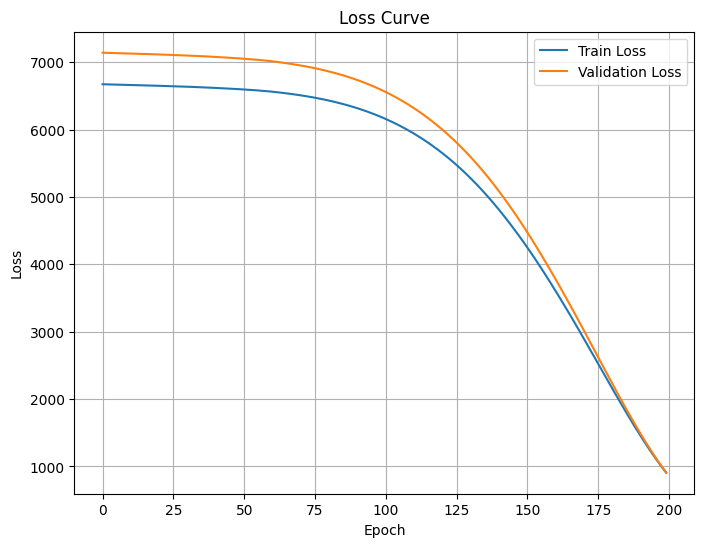


📊 Đánh giá mô hình:
MAE : 30.14
RMSE: 30.17
R²  : -29.8458
✅ Kết quả đã lưu vào 'score_predictions.csv'


In [65]:
#Câu 18
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Chuẩn bị dữ liệu ---
df_model = df_temp.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])

# One-hot encoding
df_encoded = pd.get_dummies(df_model, columns=['Course'])
features = ['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']
X = df_encoded[features].values.astype(float)
y = df_model['Score'].values.astype(float).reshape(-1, 1)

# Chuẩn hóa
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chuyển sang tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# DataLoader
batch_size = 16
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size)

# --- Mô hình ---
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    def forward(self, x):
        return self.net(x)

model = ANNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Huấn luyện có Early Stopping ---
num_epochs = 200
patience = 20
best_loss = np.inf
trigger_times = 0
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
    val_loss /= len(test_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1:3d}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("⚠️ Early stopping triggered!")
            break

# Load best model
model.load_state_dict(best_model_state)

# --- Vẽ Loss Curve ---
plt.figure(figsize=(8,6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# --- Dự đoán & Đánh giá ---
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()
    y_true = y_test.squeeze().numpy()

# Đánh giá
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"\n📊 Đánh giá mô hình:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.4f}")

# --- Lưu kết quả ra file CSV ---
df_result = pd.DataFrame({'Actual_Score': y_true, 'Predicted_Score': y_pred})
df_result.to_csv("score_predictions.csv", index=False)
print("✅ Kết quả đã lưu vào 'score_predictions.csv'")

Đề xuất kiến trúc ANN khác:

Kiến trúc hiện tại:

Input Layer: 5 nơ-ron

Hidden Layer 1: 32 nơ-ron, ReLU

Hidden Layer 2: 16 nơ-ron, ReLU

Hidden Layer 3: 8 nơ-ron, ReLU

Output Layer: 1 nơ-ron

R² = 0.7449 cho thấy mô hình chưa đủ tốt. Để cải thiện, ta cần:

Tăng khả năng biểu diễn (học được các mối quan hệ phức tạp hơn).

Kiểm soát overfitting.

Kiến trúc đề xuất (thay đổi số nơ-ron và thêm tầng, đồng thời kiểm soát overfitting):

Input Layer: 5 nơ-ron

Hidden Layer 1: 64 nơ-ron, ReLU

Hidden Layer 2: 32 nơ-ron, ReLU

Hidden Layer 3: 16 nơ-ron, ReLU

Output Layer: 1 nơ-ron
Lý do dựa trên đặc điểm dữ liệu giáo dục (theo yêu cầu PDF):

Tăng số lượng nơ-ron:

Logic: Dữ liệu về điểm số, attendance, study hours có thể có quan hệ phức tạp. Tăng số nơ-ron giúp mô hình học các quan hệ này tốt hơn.

Lý do: Các yếu tố ảnh hưởng đến điểm thi không chỉ tuyến tính, mà có thể có nhiều tương tác và phụ thuộc lẫn nhau.

Ngữ cảnh thực tế: Một sinh viên có thể đạt điểm cao dù ít học nếu có năng khiếu bẩm sinh hoặc phương pháp học tập hiệu quả.

Giảm số lượng lớp:

Logic: Các mô hình nhiều lớp có nguy cơ gây ra hiện tượng overfitting trong bộ dữ liệu nhỏ

Lý do: Ba lớp tiềm ẩn có thể đã học quá nhiều dữ liệu đào tạo, trong khi ít lớp hơn có thể học các mẫu chung hơn.

Ngữ cảnh thực tế: Trong một bộ dữ liệu có số lượng quan sát hạn chế, việc giảm số lượng lớp có thể giúp tăng khả năng khái quát hóa

Thêm Dropout (để tránh overfitting - dù đề bài yêu cầu không "chỉ" dùng Dropout, nhưng nó vẫn quan trọng):
* Logic: Dropout giúp ngăn chặn các nơ-ron trở nên quá phụ thuộc vào các nơ-ron khác, từ đó giảm overfitting.
* Lý do: Overfitting xảy ra khi mô hình học quá tốt trên tập train, nhưng không tốt trên tập test.

In [62]:
# Câu 19
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Tiền xử lý dữ liệu
df_model = df_temp.dropna(subset=['Score', 'Attendance (%)', 'Study_Hours'])
df_encoded = pd.get_dummies(df_model, columns=['Course'])
features = ['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']
df_input = df_encoded[features]
y = df_model['Score']

scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)

# 2. Tách dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(df_input_scaled, y, test_size=0.2, random_state=42)

# 3. Dataset tùy chỉnh
class ScoreDataset(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = ScoreDataset(X_train, y_train)

# 4. Định nghĩa mô hình
class ScorePredictor(nn.Module):
    def __init__(self):
        super(ScorePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.model(x)

model = ScorePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Huấn luyện mô hình
for epoch in range(200):
    model.train()
    for X_batch, y_batch in DataLoader(train_dataset, batch_size=16, shuffle=True):
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

# 6. Dự đoán và đánh giá trên tập test
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_pred = model(X_test_tensor).detach().numpy().flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n MSE: {mse:.4f}")
print(f" R² Score: {r2:.4f}")




 MSE: 20.2805
 R² Score: 0.7956




**1. Đánh giá mô hình (đã có):**

*   MSE: 20.2805
*   R²: 0.7956

R² = 0.7956, vẫn dưới ngưỡng 0.8. Cần phân tích nguyên nhân và đề xuất cải thiện.

**2. Phân tích nguyên nhân sai lệch dự đoán (dựa trên đặc trưng đầu vào):**

*   **Vấn đề:** Mô hình chỉ giải thích được khoảng 80% sự biến động của điểm số. 20% còn lại chưa được giải thích.

*   **Nguyên nhân tiềm ẩn (dựa trên đặc trưng đầu vào: Course, Attendance, Study Hours):**

    *   **Mối quan hệ phi tuyến tính:** Điểm số có thể không có quan hệ tuyến tính đơn giản với Attendance và Study Hours.  Có thể có một ngưỡng về thời gian học, sau đó việc tăng thời gian học không mang lại nhiều cải thiện về điểm số. Mối quan hệ có thể là hình chữ U ngược (quá ít hoặc quá nhiều thời gian học đều không tốt).
    *   **Thiếu tương tác giữa các đặc trưng:** Mô hình hiện tại có thể chưa xem xét đủ các tương tác giữa các đặc trưng. Ví dụ, hiệu quả của Attendance có thể phụ thuộc vào môn học.
    *   **Bỏ qua yếu tố chất lượng học tập:** Mô hình chỉ xem xét thời gian học (Study Hours), không xem xét chất lượng học tập (ví dụ, phương pháp học, tài liệu học tập).
    *   **Tính đồng nhất của Attendance:** Attendance chỉ đo lường việc có mặt, không đo lường sự tập trung và tương tác trong lớp.
    *   **Ảnh hưởng của các yếu tố bên ngoài:** Các yếu tố bên ngoài như sức khỏe, tâm trạng, và áp lực gia đình có thể ảnh hưởng đến điểm số, nhưng không được mô hình xem xét.
*   **Tính chất rời rạc của Course:** One-hot encoding có thể không nắm bắt được mối quan hệ giữa các môn học (ví dụ, một số môn có thể liên quan đến nhau hơn các môn khác).

**3. Đề xuất cải thiện mô hình (dựa trên ngữ cảnh giáo dục, KHÔNG chỉ dùng dropout/optimizer):**

*   **Bổ sung đặc trưng tương tác (quan trọng nhất):**

    *   **Cách thực hiện:** Tạo các đặc trưng mới bằng cách kết hợp các đặc trưng hiện có. Ví dụ:
        *   `Attendance * StudyHours`: Thể hiện sự kết hợp giữa chuyên cần và nỗ lực.
        *   `Attendance * Course_Math`, `Attendance * Course_Physics`, `Attendance * Course_Chemistry`: Cho phép mô hình học các tác động khác nhau của attendance lên từng môn học.
    *   **Logic:** Các tương tác giữa các đặc trưng có thể có ảnh hưởng lớn đến điểm số.
    *   **Lý do:** Ví dụ, attendance có thể quan trọng hơn với các môn học khó, trong khi study hours có thể quan trọng hơn với các môn học đòi hỏi kỹ năng thực hành.
    *   **Ngữ cảnh thực tế:** Trong giáo dục, sự kết hợp giữa các yếu tố khác nhau thường quan trọng hơn bản thân từng yếu tố riêng lẻ.
 *   **Đánh giá chất lượng tham gia lớp học**
    *   **Cách thực hiện:** Xem xét các cách để đo lường sự tham gia tích cực của học sinh thay vì chỉ đơn giản là điểm danh. Điều này có thể bao gồm việc theo dõi sự tham gia của học sinh vào các cuộc thảo luận trên lớp hoặc đánh giá chất lượng công việc trên lớp của họ.
    *   **Logic:** Số liệu điểm danh có thể không phản ánh chính xác mức độ tham gia và tương tác của học sinh với tài liệu.
    *   **Lý do:** Sự tham gia và tương tác tích cực có thể mang lại kết quả học tập tốt hơn.
    *   **Bối cảnh thực tế:** Các nhà giáo dục thường sử dụng các phương pháp đánh giá chủ quan và khách quan để đo lường sự tham gia của học sinh, chẳng hạn như quan sát và câu đố.

*   **Sử dụng embedding cho Course (thay vì one-hot encoding):**

    *   **Cách thực hiện:** Thay vì one-hot encoding, sử dụng một lớp embedding để biểu diễn Course. Điều này cho phép mô hình học được các mối quan hệ giữa các môn học.
    *   **Logic:** Các môn học có thể có liên hệ với nhau (ví dụ: Toán và Lý có liên quan mật thiết hơn Hóa và Văn).
    *   **Lý do:** One-hot encoding coi tất cả các môn học là độc lập với nhau.
    *   **Ngữ cảnh thực tế:** Embedding thường được sử dụng trong xử lý ngôn ngữ tự nhiên để biểu diễn các từ, và có thể áp dụng tương tự cho các môn học.


